In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv("fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
# Get the Independent Features

X = df.drop("label",axis=1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
# Get Dependent feature
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
 df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
message = df.copy()

In [13]:
message.reset_index(inplace=True)

None


In [25]:
message.head(10)

,level_0,index,id,title,author,text,label
0,0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
message['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
from nltk.stem.porter import PorterStemmer

In [20]:
ps = PorterStemmer() 

In [22]:
corpus = []
for i in range(len(message)):
    review = re.sub('[^a-zA-Z]',' ',message["title"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words("English")]
    review = ' '.join(review)
    corpus.append(review)

In [30]:
### Applying CountVectorizer
### Creating Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 8000,ngram_range=(1,3))  
## ngram_Range() it will take the number of words for example
### Tejash Govind Sharma
# so first Tejash then Tejash Govind them Tejash Govind Sharma
X = cv.fit_transform(corpus).toarray() ## Dependent

In [31]:
X.shape

(18285, 8000)

In [35]:
y = message['label']  ## Independent feature 

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [34]:
## Dividing the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [49]:
cv.get_feature_names_out()

array(['aaron', 'ab', 'abandon', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [51]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 8000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [52]:
count_df = pd.DataFrame(X_train,columns=cv.get_feature_names_out())

In [53]:
count_df.head()

,aaron,ab,abandon,abba,abc,abc news,abduct,abe,abedin,abl,...,zika new,zika new york,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## MultinomialNB Algorithm

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
import matplotlib.pyplot as plt
import numpy as np

In [80]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    
    thresh =cm.max() / 2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")

accuracy: 0.905
Confusion matrix, without normalization


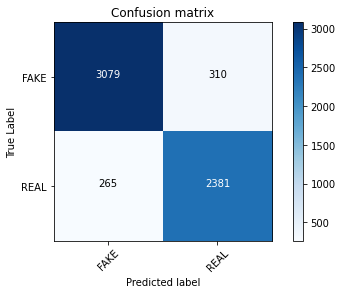

In [81]:
from sklearn import metrics
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["FAKE","REAL"])

In [82]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)

In [83]:
print(score)

0.9047224523612262


In [84]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

In [88]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy 0.926
Confusion matrix, without normalization


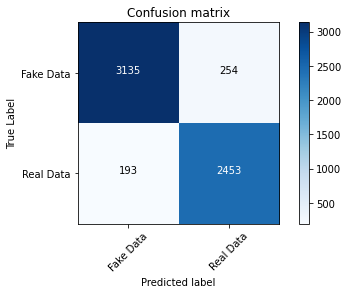

In [91]:
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy %0.3f" %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["Fake Data","Real Data"])

## Multinomial Classifier with Hyperparameter

In [92]:
classifier = MultinomialNB(alpha=0.1)

In [93]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Python\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.884009942004971
Alpha: 0.1, Score : 0.9043910521955261
Alpha: 0.2, Score : 0.9053852526926264
Alpha: 0.30000000000000004, Score : 0.9053852526926264
Alpha: 0.4, Score : 0.9053852526926264
Alpha: 0.5, Score : 0.9055509527754764
Alpha: 0.6000000000000001, Score : 0.9048881524440763
Alpha: 0.7000000000000001, Score : 0.9043910521955261
Alpha: 0.8, Score : 0.9043910521955261
Alpha: 0.9, Score : 0.9043910521955261


In [103]:
## Get Features names
feature_names = cv.get_feature_names_out()
print(feature_names)

['aaron' 'ab' 'abandon' ... 'zoo' 'zu' 'zuckerberg']


In [102]:
classifier.feature_log_prob_[0]

array([-10.0805281 , -10.79965076,  -9.14896989, ..., -10.0805281 ,
       -11.54686516,  -9.50998324])

In [104]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-3.035265364318052, 'new'),
 (-3.0826274664395257, 'time'),
 (-3.0889738585565087, 'york'),
 (-3.0892096853663933, 'new york'),
 (-3.1032228350611106, 'york time'),
 (-3.1032228350611106, 'new york time'),
 (-4.05323863366284, 'breitbart'),
 (-4.09298146961592, 'trump'),
 (-5.364091789164262, 'donald'),
 (-5.3709978939606735, 'donald trump'),
 (-5.84345312838465, 'say'),
 (-6.0806820765091745, 'obama'),
 (-6.104447453544641, 'clinton'),
 (-6.195007030590369, 'presid'),
 (-6.2109309339470915, 'state'),
 (-6.265920047242869, 'report'),
 (-6.277290266384052, 'attack'),
 (-6.342248162658825, 'hous'),
 (-6.348368132800609, 'brief'),
 (-6.405201607563775, 'hillari')]

In [106]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-11.546865164066435, 'abstain un'),
 (-11.546865164066435, 'abstain un vote'),
 (-11.546865164066435, 'access pipelin protest'),
 (-11.546865164066435, 'accident post'),
 (-11.546865164066435, 'acknowledg emf'),
 (-11.546865164066435, 'acknowledg emf damag'),
 (-11.546865164066435, 'acquit'),
 (-11.546865164066435, 'acquit malheur'),
 (-11.546865164066435, 'acquit malheur wildlif'),
 (-11.546865164066435, 'acr'),
 (-11.546865164066435, 'activ foreign'),
 (-11.546865164066435, 'activ foreign agent'),
 (-11.546865164066435, 'adhd'),
 (-11.546865164066435, 'agenda radio'),
 (-11.546865164066435, 'agenda radio week'),
 (-11.546865164066435, 'agent saudi'),
 (-11.546865164066435, 'agent saudi arabian'),
 (-11.546865164066435, 'airstrik kill'),
 (-11.546865164066435, 'al aqsa'),
 (-11.546865164066435, 'al aqsa mosqu')]

## TFidf Vectorizer


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf.fit_transform(corpus).toarray()

In [108]:
X.shape

(18285, 5000)

In [109]:
y = message['label']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

In [119]:
tfidf.get_feature_names_out()

array(['abandon', 'abc', 'abc news', ..., 'zoo', 'zu', 'zuckerberg'],
      dtype=object)

In [120]:
count_df = pd.DataFrame(X_train,columns=tfidf.get_feature_names_out())

In [121]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


accuracy: 0.882
Confusion matrix, without normalization


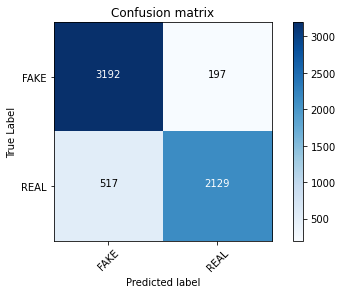

In [122]:
from sklearn import metrics
import itertools
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["FAKE","REAL"])

In [123]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)

In [124]:
print(score)

0.8816901408450705


In [125]:
y_train.shape

(12250,)

## Passive Aggressive Classifier Algorithm

accuracy 0.918
Confusion matrix, without normalization


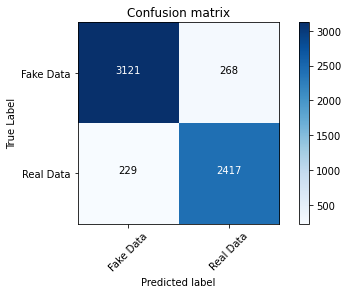

In [126]:
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy %0.3f" %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["Fake Data","Real Data"])

## Multinomial Classifier with Hyperparameter

In [127]:
classifier = MultinomialNB(alpha=0.1)
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Python\lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Python\lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score : 0.8662800331400166
Alpha: 0.1, Score : 0.8777133388566695
Alpha: 0.2, Score : 0.8801988400994201
Alpha: 0.30000000000000004, Score : 0.87986743993372
Alpha: 0.4, Score : 0.8808616404308203
Alpha: 0.5, Score : 0.8806959403479702
Alpha: 0.6000000000000001, Score : 0.8815244407622204
Alpha: 0.7000000000000001, Score : 0.8813587406793704
Alpha: 0.8, Score : 0.8816901408450705
Alpha: 0.9, Score : 0.8816901408450705


In [128]:
## Get Features names
feature_names = cv.get_feature_names_out()
print(feature_names)

['aaron' 'ab' 'abandon' ... 'zoo' 'zu' 'zuckerberg']


In [129]:
classifier.feature_log_prob_[0]

array([ -8.59813984,  -8.64311917,  -9.67080665, ...,  -9.40176836,
       -10.25997178,  -8.97209716])

In [130]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names), reverse=True)[:20]

[(-3.94976034988254, 'goldman'),
 (-3.9689481006947727, 'passag'),
 (-3.969032969681349, 'got wrong'),
 (-3.9728936199761264, 'mueller'),
 (-3.979866660651135, 'past new'),
 (-3.979866660651135, 'govern market'),
 (-4.6215808113530885, 'bank'),
 (-4.797902430598906, 'neighborhood'),
 (-5.666344542746281, 'cleveland'),
 (-5.669113589614728, 'clever'),
 (-6.0459788417963765, 'later new york'),
 (-6.244307613966834, 'guid new'),
 (-6.323461418144095, 'inaugur day'),
 (-6.352839646565577, 'martin'),
 (-6.356125020747031, 'anti israel'),
 (-6.3889872010186926, 'johnson johnson order'),
 (-6.448929663358422, 'du'),
 (-6.4590649672726705, 'brag'),
 (-6.537209809297861, 'bannon breitbart'),
 (-6.577300430009248, 'event breitbart')]

In [131]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:20]

[(-10.259971779167145, 'abus'),
 (-10.259971779167145, 'accid'),
 (-10.259971779167145, 'accident'),
 (-10.259971779167145, 'accord'),
 (-10.259971779167145, 'accus'),
 (-10.259971779167145, 'act like'),
 (-10.259971779167145, 'ag'),
 (-10.259971779167145, 'age new york'),
 (-10.259971779167145, 'alan'),
 (-10.259971779167145, 'alcohol'),
 (-10.259971779167145, 'aleppo'),
 (-10.259971779167145, 'aleppo new'),
 (-10.259971779167145, 'alex marlow'),
 (-10.259971779167145, 'amnesti'),
 (-10.259971779167145, 'ampt'),
 (-10.259971779167145, 'anderson cooper'),
 (-10.259971779167145, 'andi'),
 (-10.259971779167145, 'annual'),
 (-10.259971779167145, 'app'),
 (-10.259971779167145, 'appear stand')]

## HashingVectorizer

In [161]:
hs_vectorizer = HashingVectorizer(n_features=5000,alternate_sign=False)
X = hs_vectorizer.fit_transform(corpus).toarray()

In [162]:
X.shape

(18285, 5000)

In [163]:
## Divide the dataset into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)

accuracy: 0.871
Confusion matrix, without normalization


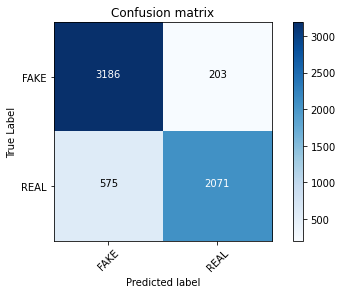

In [164]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=["FAKE","REAL"])

In [166]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print(score)

0.8710853355426678
